In [4]:
import numpy as np
import pandas as pd

In [5]:
from sklearn import linear_model
from matplotlib import pyplot as plt

In [39]:
train_data = pd.read_csv('/content/crime_train (1).csv')
train_data.head()

,ID,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
0,1,14985,2.56,16.55,34.42,22.54,10.13,0,0.0,35545,...,23.3,13.5,0,0,3.32,60.94,47.28,66.65,82.41,428.64
1,2,30843,2.83,15.45,35.12,18.14,4.70,0,0.0,32033,...,21.6,10.9,68,41,4.98,25.24,28.17,52.73,59.20,742.54
2,3,74991,2.52,10.48,20.43,9.11,20.68,73342,97.8,31177,...,23.6,11.9,0,0,6.51,13.69,34.49,60.88,66.97,303.72
3,4,45061,2.44,10.59,24.97,11.61,16.34,45061,100.0,39822,...,24.0,16.3,0,1,13.13,67.79,65.19,84.28,91.32,373.88
4,5,12863,2.45,12.02,22.51,10.49,18.46,0,0.0,23044,...,16.0,11.7,0,0,1.08,80.22,53.17,86.56,93.15,108.07


In [40]:
test_data = pd.read_csv('/content/crime_test (1).csv')
test_data.head()

,ID,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,...,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85
0,1,11874,2.11,10.54,30.87,14.08,8.16,11874,100.0,30141,...,22.9,19.2,11.4,2,1,7.02,51.78,39.89,75.63,83.39
1,2,14143,2.68,21.01,33.35,21.95,14.55,0,0.0,23886,...,30.5,21.0,14.9,0,0,2.35,75.91,51.79,72.20,88.40
2,3,34882,2.32,12.56,21.79,11.29,19.51,34881,100.0,21053,...,26.5,16.9,11.8,0,9,1.61,74.43,62.60,86.35,90.85
3,4,29885,3.53,20.10,34.33,18.31,8.18,29885,100.0,18956,...,26.2,19.8,13.8,0,0,18.46,68.90,52.42,83.01,90.76
4,5,935933,2.86,15.89,30.35,14.98,9.50,935927,100.0,23584,...,25.3,20.9,12.7,698,44,9.35,69.25,51.62,83.78,90.95


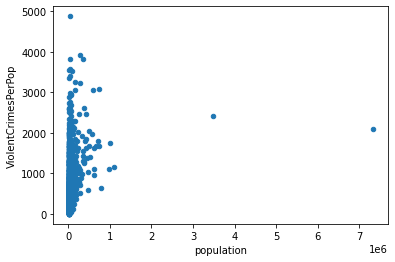

In [41]:
train_data.plot(kind='scatter', x='population', y='ViolentCrimesPerPop', alpha = 1)

In [45]:
y = train_data["ViolentCrimesPerPop"]
train_data = train_data.drop(["ID"],axis=1)
X = train_data.drop(["ViolentCrimesPerPop"], axis=1)
x = train_data["population"]

In [46]:
rl = linear_model.LinearRegression().fit(X,y)
rl.coef_

array([ 7.14919936e-04,  1.23800100e+01, -8.28000652e+00, -3.58840708e+01,
        3.34549393e+01, -1.30305450e+01, -8.54932516e-04,  1.41109567e+00,
       -2.27552750e-02, -7.00821090e+00,  2.95727019e+01, -6.67902639e+00,
        1.15458646e+01,  8.82161707e+00, -8.30115048e+00,  1.83594413e-02,
       -4.98509797e-03, -2.78001000e-03, -2.94824284e+00, -1.43136672e+01,
        4.97783566e+00,  1.75724402e+00, -1.30374690e+00,  1.20918533e+01,
       -4.06281211e+00,  2.15366190e+00, -4.99653775e-01,  4.22547268e+00,
        2.00271997e+02, -2.07777399e+00,  1.43816056e+02, -3.32259909e+02,
       -4.05926926e+02, -2.43207388e+00, -1.93158681e+01,  2.92604083e+00,
       -7.24481971e-01,  3.29895767e+00, -1.01925764e+01, -1.42096878e-03,
        5.64015457e+01,  8.53412360e-04,  2.72361194e+00, -1.48151566e+00,
       -1.37678352e-03,  1.12487361e+00, -4.05246604e+01, -1.47028063e+01,
        1.30649975e+01,  6.46421199e-01,  2.32781012e+00, -1.30391028e+01,
        4.72734257e+01, -

In [47]:
X_test = test_data.drop(["ID"], axis=1)
ypred = rl.predict(X_test)
ypred

array([ 7.74083197e+02,  3.66434629e+02,  6.34207067e+02,  8.13230393e+02,
        1.02856685e+03,  2.14019941e+02,  1.14682448e+03,  1.43556565e+02,
        1.40067431e+03,  8.85117389e+02,  2.38993146e+02,  3.91039235e+02,
        1.04891330e+02,  2.72957785e+02,  1.05334648e+03,  1.30651053e+03,
        7.78314315e+02,  3.04899384e+02,  1.36312440e+03,  1.62038631e+03,
        3.56694104e+02,  4.08799532e+02,  1.06180015e+03,  9.17911375e+01,
        9.09218622e+02,  1.81715385e+02,  1.05451816e+03,  6.42015280e+02,
        3.98739407e+02,  3.16383772e+02,  2.37191077e+02,  2.94315483e+02,
        1.77102237e+02,  4.58489407e+02,  3.86055520e+02,  5.20447896e+01,
        1.29208105e+02,  2.93901493e+02,  9.53618132e+02,  1.54020851e+00,
       -8.43047519e+01,  1.47643391e+03,  1.72991284e+02,  4.15353367e+02,
        1.05275001e+03,  7.07897555e+01,  5.99164576e+02,  1.60693365e+02,
        8.04174947e+02,  2.07094458e+02,  8.22130304e+02,  4.28374903e+02,
        9.56457407e+02,  

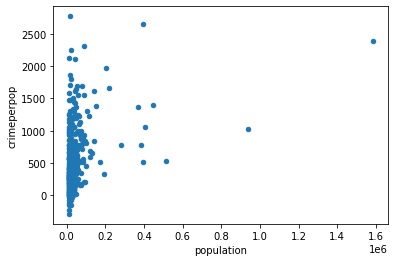

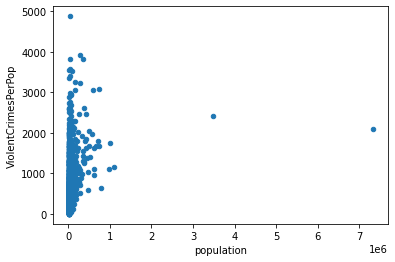

In [48]:
test_data["crimeperpop"] = ypred
test_data.plot(y = "crimeperpop", x = "population", kind = "scatter")
train_data.plot(kind='scatter', x='population', y='ViolentCrimesPerPop', alpha = 1)
# plt.plot(X_test, ypred, color ='k')

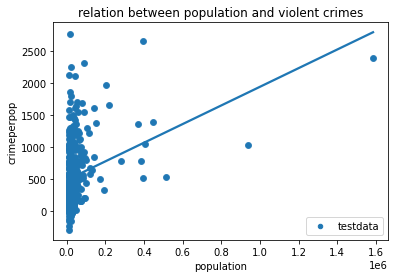

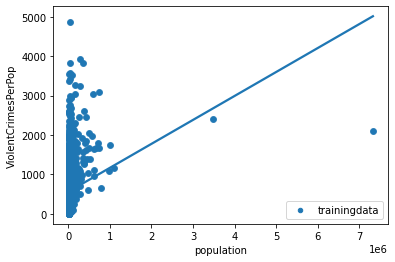

In [51]:
testdata=pd.read_csv("/content/crime_test (1).csv")
Xtest=testdata.drop(["ID"],axis=1)
ytest=rl.predict(Xtest)

import seaborn as sb
test_data["crimeperpop"]=ytest
test_data.plot(y="crimeperpop",x="population",kind="scatter",label='testdata',title="relation between population and violent crimes")
sb.regplot(x = "population",y = "crimeperpop", ci = None,data = test_data)
train_data.plot(y="ViolentCrimesPerPop",x="population",kind="scatter",label='trainingdata')
sb.regplot(x = "population",y = "ViolentCrimesPerPop", ci = None,data = train_data)

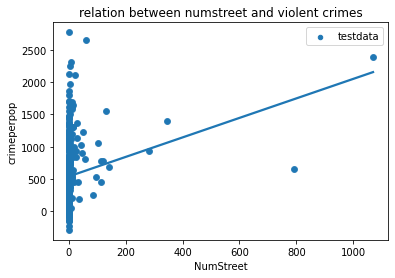

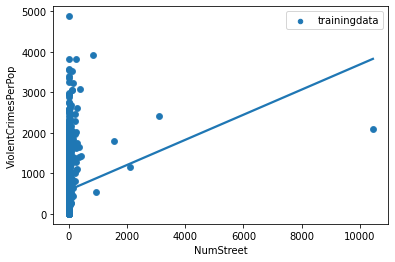

In [53]:
testdata["crimeperpop"]=ytest

testdata.plot(y="crimeperpop",x="NumStreet",kind="scatter",label='testdata',title="relation between numstreet and violent crimes")
sb.regplot(x = "NumStreet",y = "crimeperpop", ci = None,data = testdata)
train_data.plot(y="ViolentCrimesPerPop",x="NumStreet",kind="scatter",label='trainingdata')
sb.regplot(x = "NumStreet",y = "ViolentCrimesPerPop", ci = None,data = train_data)